In [1]:
# ref = https://tykimos.github.io/2017/06/10/CNN_Data_Augmentation/

In [2]:
# 1 문제 정의하고, 패키지 준비하고, 랜덤 시드 지정하기

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Dropout

# 랜덤 시드 지정하기
np.random.seed(3)

Using TensorFlow backend.


In [3]:
# 2 데이터셋 불러오기 (with duplicate)
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')

img = load_img('warehouse/handwriting_shape/train/triangle/triangle001.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

# 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir='warehouse/preview', save_prefix='tri', save_format='png'):
    i += 1
    if i > 30: 
        break

In [4]:
# 3 데이터셋 생성하기 (with duplicate)
#     ImageDataGenerator
#         rotation_range
#         width_shift_range
#         height_shift_range
#         shear_range
#         zoom_range
#         horizontal_flip
#         vertical_flip

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        'warehouse/handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'warehouse/handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [5]:
# 4 모델 구성하기 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

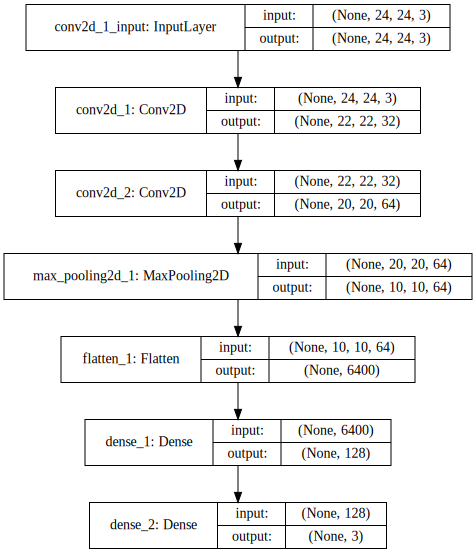

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [7]:
# 5 모델 학습과정 설정하기

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# 6 모델 학습시키기

model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 100,
        epochs=3,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/3
1500/1500 [==============================] - 42s 28ms/step - loss: 0.4273 - acc: 0.8196 - val_loss: 0.2084 - val_acc: 0.9333
Epoch 2/3
1500/1500 [==============================] - 41s 27ms/step - loss: 0.1839 - acc: 0.9373 - val_loss: 0.0681 - val_acc: 1.0000
Epoch 3/3
1500/1500 [==============================] - 41s 27ms/step - loss: 0.1194 - acc: 0.9564 - val_loss: 2.5744e-04 - val_acc: 1.0000


In [9]:
# 7 모델 평가하기
print("-- Evaluate --")

scores = model.evaluate_generator(test_generator, steps = 5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 100.00%


In [10]:
# 8 모델 예측하기

print("-- Predict --")
output = model.predict_generator(test_generator, steps = 5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(test_generator.class_indices)
print(output)

-- Predict --
{'triangle': 2, 'circle': 0, 'rectangle': 1}
[[0.001 0.000 0.999]
 [0.000 1.000 0.000]
 [0.001 0.000 0.999]
 [0.000 1.000 0.000]
 [0.001 0.000 0.999]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]]
